<a href="https://colab.research.google.com/github/Nasrinshaikh21/data-science-project/blob/main/used%20car%20price%20prediction%20using%20decision%20Tree%20Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [243]:
#Importing Dataset
df=pd.read_csv('/content/drive/MyDrive/car prediction/car_data.csv')

In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [246]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [181]:
df.ndim

2

In [247]:
df.shape

(4340, 8)

In [248]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [249]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [251]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [252]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [253]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [254]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [255]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [256]:
#create column new_fuel
dfc = df.copy()

In [257]:
x = df.fuel.replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})
df.insert(4,'new_fuel',x)

<ipython-input-257-e44440a1d7dd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = df.fuel.replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})


In [258]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [259]:
df.new_fuel.unique()

array([0, 1, 2, 3, 4])

In [260]:
new_df = df.copy()

In [261]:
new_df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [262]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [263]:
new_df = new_df[['fuel','seller_type']]

In [264]:
type(new_df)

pandas.core.frame.DataFrame

In [265]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [266]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [267]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [268]:
new_df

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual
...,...,...
4335,Diesel,Individual
4336,Diesel,Individual
4337,Petrol,Individual
4338,Diesel,Individual


In [269]:
enc

OneHotEncoder(handle_unknown='ignore')

In [270]:
enc_df = pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [271]:
new_df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [272]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0


In [273]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [274]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

In [275]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission']= LabelEncoder().fit_transform(df['transmission'])
df['owner']= LabelEncoder().fit_transform(df['owner'])

In [276]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,0,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,1,2


In [277]:
#current year
df['current_year']=2025

In [278]:
df['no_of_year'] = df['current_year']-df['year']

In [279]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner,current_year,no_of_year
0,Maruti 800 AC,2007,60000,70000,0,4,1,1,0,2025,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,1,1,0,2025,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,1,0,2025,13
3,Datsun RediGO T Option,2017,250000,46000,0,4,1,1,0,2025,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,1,2,2025,11


In [280]:
#deleting columns and renaming column
df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)#temeproray change

In [217]:
df.head()

,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner,no_of_year
0,60000,70000,0,4,1,1,0,18
1,135000,50000,0,4,1,1,0,18
2,600000,100000,1,1,1,1,0,13
3,250000,46000,0,4,1,1,0,8
4,450000,141000,1,1,1,1,2,11


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   new_fuel               4340 non-null   int64
 3   fuel                   4340 non-null   int64
 4   seller_type            4340 non-null   int64
 5   transmission           4340 non-null   int64
 6   owner                  4340 non-null   int64
 7   no_of_year             4340 non-null   int64
dtypes: int64(8)
memory usage: 271.4 KB


In [282]:
df.head()

,current_selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner,no_of_year
0,60000,70000,0,4,1,1,0,18
1,135000,50000,0,4,1,1,0,18
2,600000,100000,1,1,1,1,0,13
3,250000,46000,0,4,1,1,0,8
4,450000,141000,1,1,1,1,2,11


In [283]:

#correlated values
df.corr()

,current_selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner,no_of_year
current_selling_price,1.000000,-0.192289,0.226883,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,0.274760,-0.286095,0.113689,0.120226,0.297115,0.419688
new_fuel,0.226883,0.274760,1.000000,-0.924521,-0.029301,-0.027507,0.021907,-0.090388
fuel,-0.269653,-0.286095,-0.924521,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,-0.029301,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,-0.027507,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,0.021907,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_year,-0.413922,0.419688,-0.090388,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

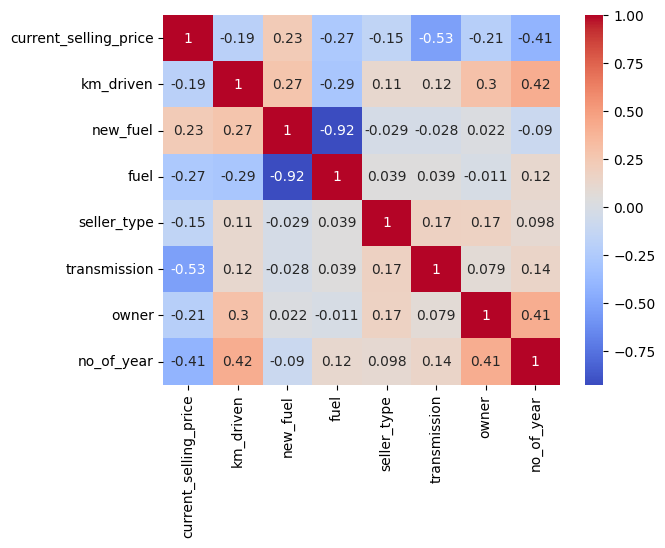

In [284]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

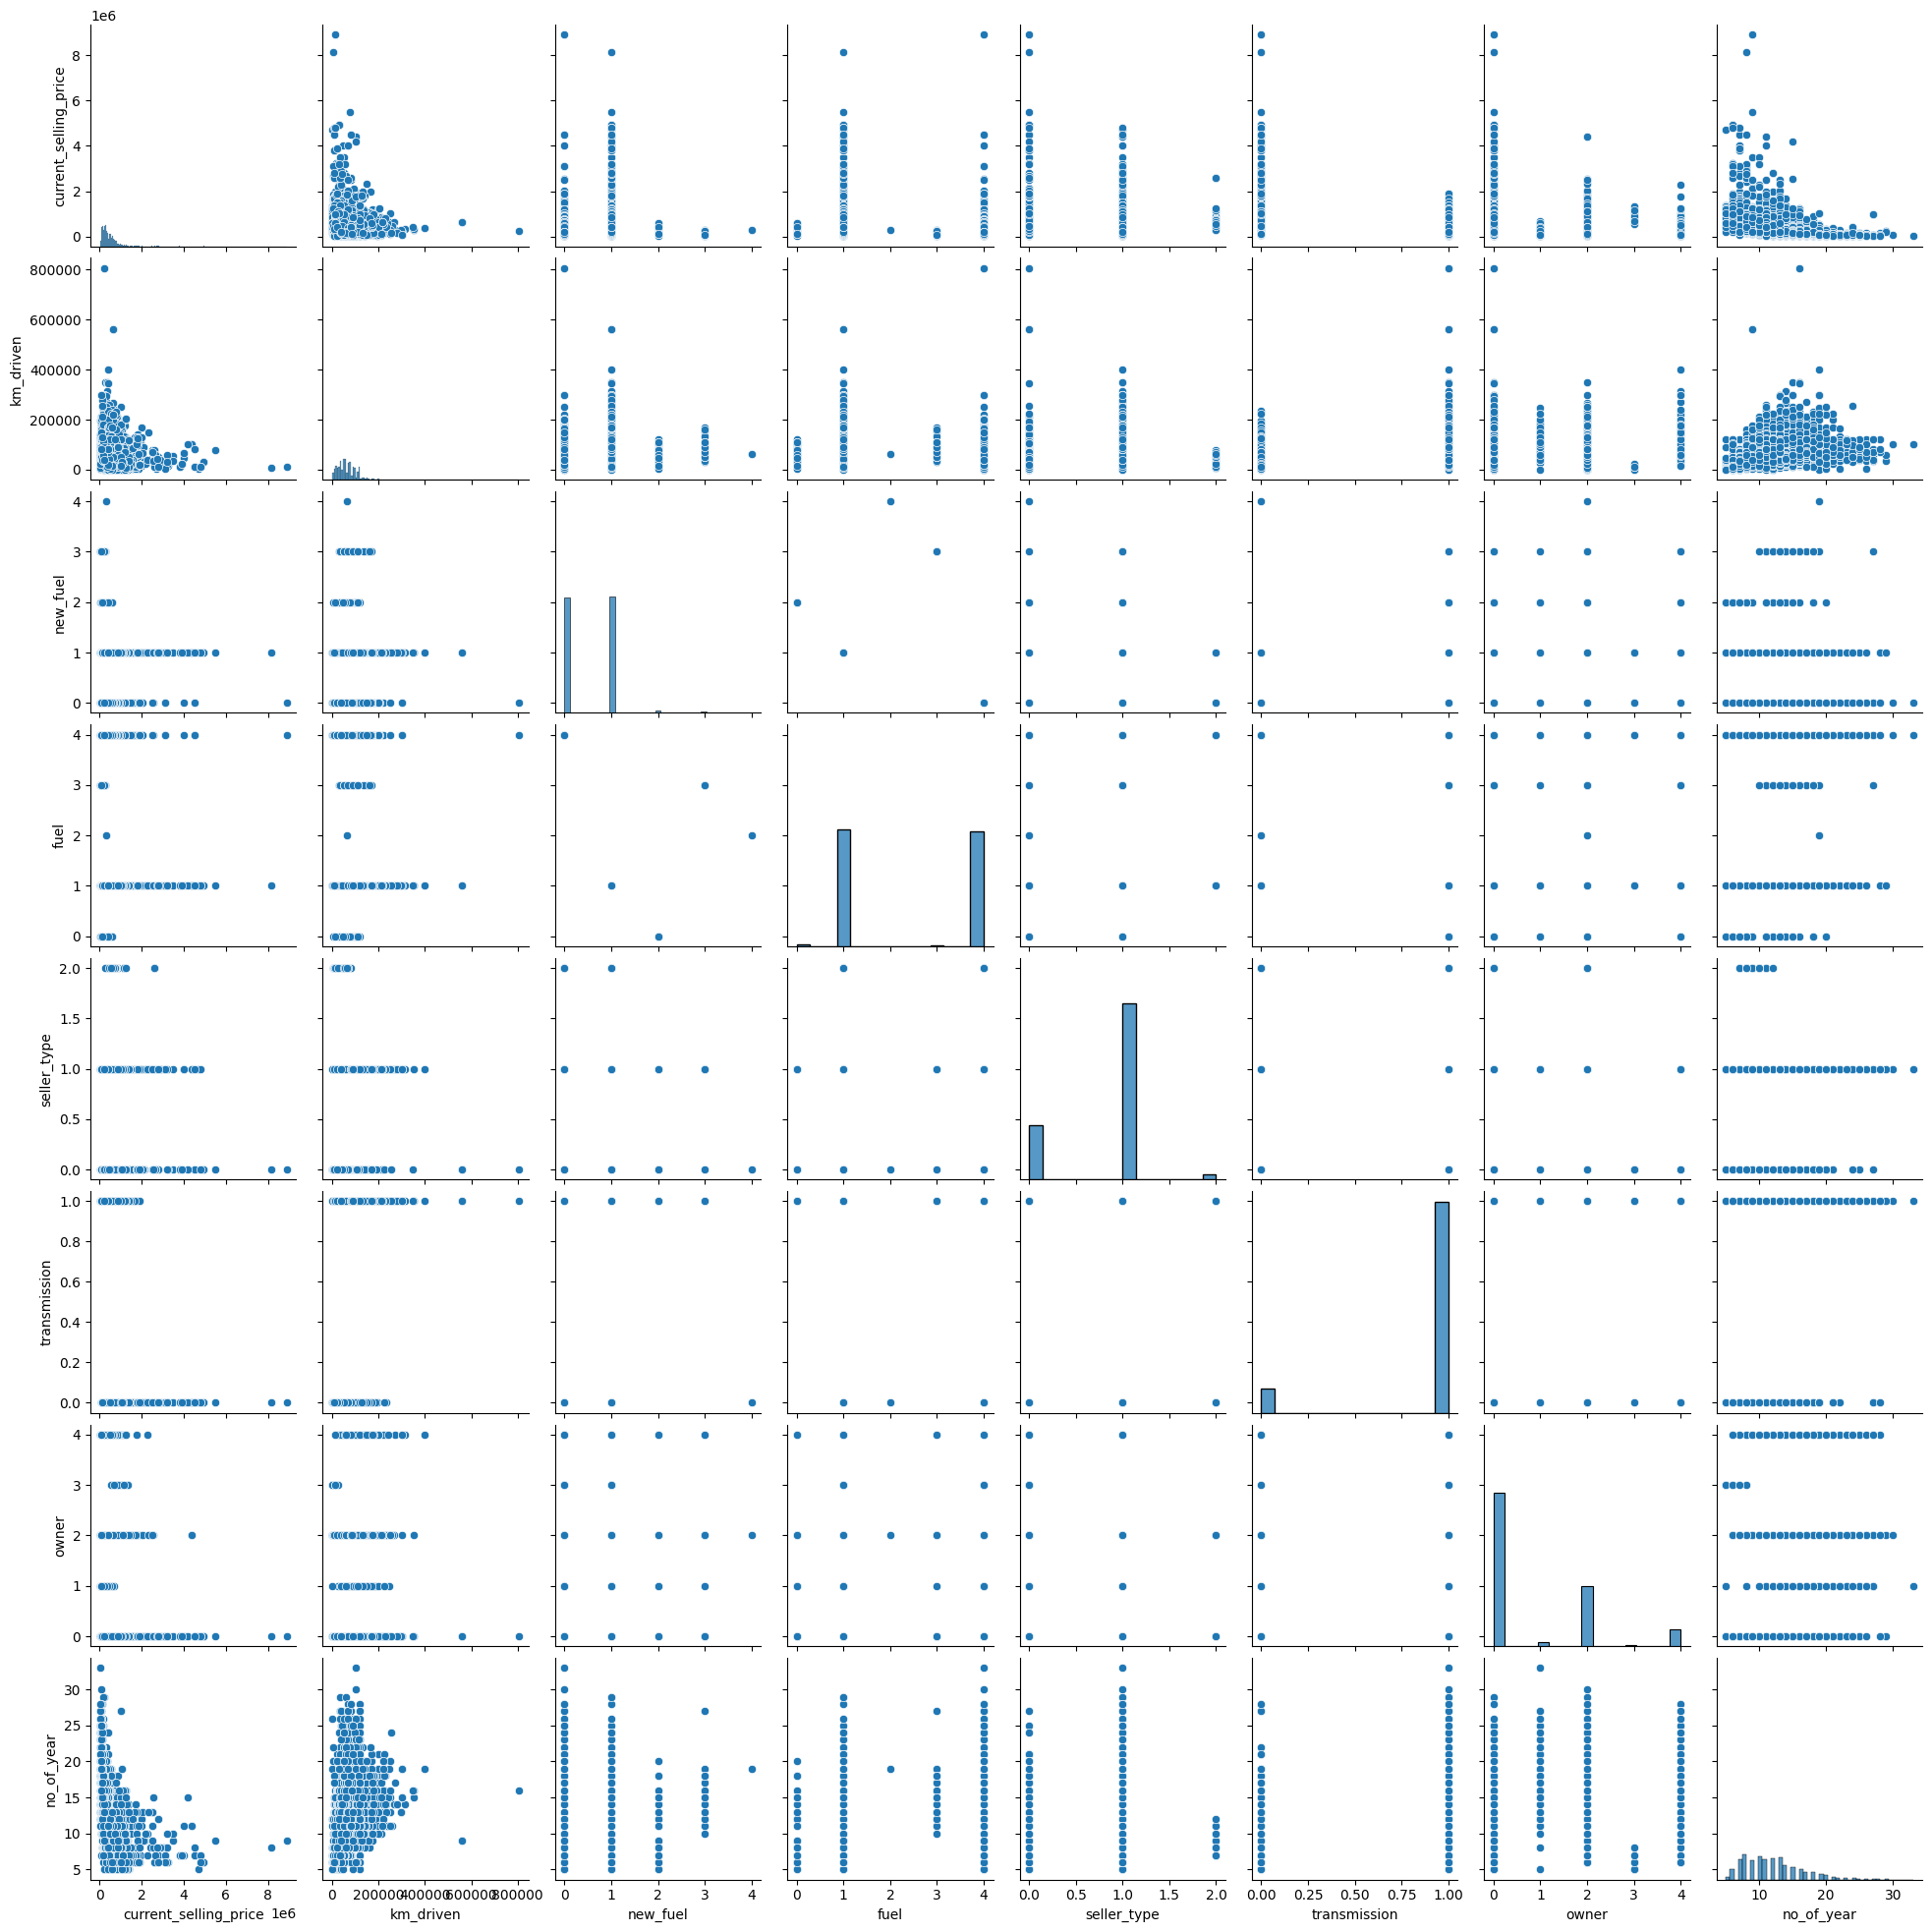

In [285]:
sns.pairplot(df)

<Axes: >

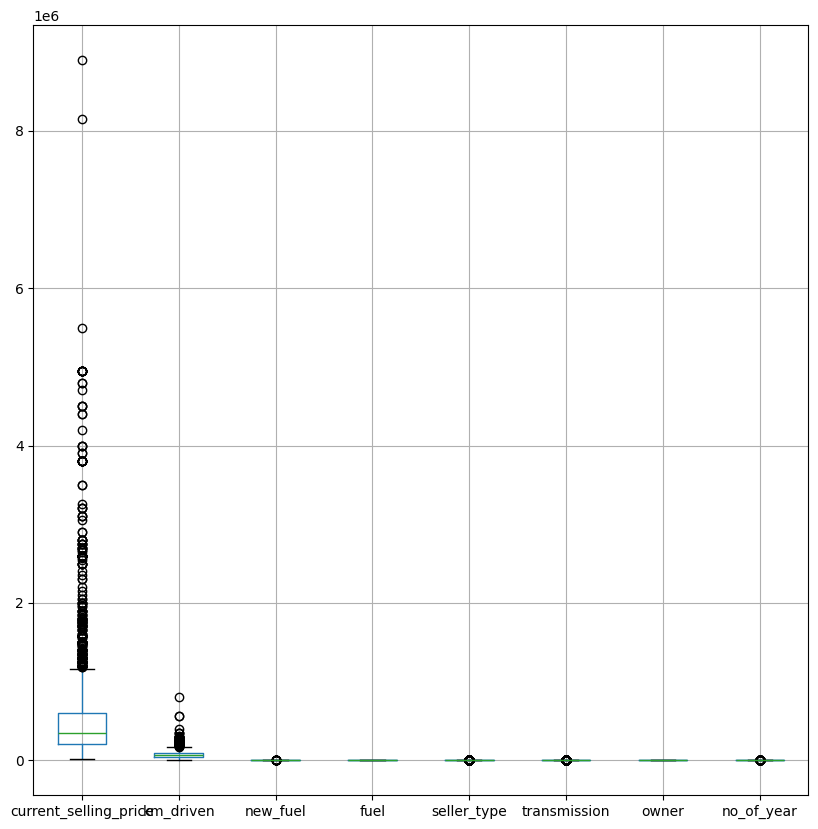

In [288]:
#outliers
plt.figure(figsize=(10,10))
df.boxplot()

In [289]:
#select the feature and targets
x = np.array(df.drop(['current_selling_price'],axis=1))
y = np.array(df['current_selling_price'])

In [291]:
x

array([[ 70000,      0,      4, ...,      1,      0,     18],
       [ 50000,      0,      4, ...,      1,      0,     18],
       [100000,      1,      1, ...,      1,      0,     13],
       ...,
       [ 83000,      0,      4, ...,      1,      2,     16],
       [ 90000,      1,      1, ...,      1,      0,      9],
       [ 40000,      0,      4, ...,      1,      0,      9]])

In [292]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000])

In [294]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [295]:
len(x_train)

3472

In [296]:
len(y_train)

3472

In [297]:
#choosing model

regressor = DecisionTreeRegressor()

In [298]:
#training Model
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [299]:
#testing Model
y_pred = regressor.predict(x_test)

In [305]:
target = pd.DataFrame({'Actual':y_test.reshape(-1),'Predicted':y_pred.reshape(-1)})

In [307]:
target.head()

,Actual,Predicted
0,399000,270000.000000
1,680000,680000.000000
2,100000,100000.000000
3,550000,513333.333333
4,1200000,500000.000000


In [311]:
#performance

r2_score(y_test,y_pred)



0.2205057563830457

In [313]:
print(mean_squared_error(y_test,y_pred))

272703794093.9861


In [314]:
print(mean_absolute_error(y_test,y_pred))

192874.71842202556


<Axes: >

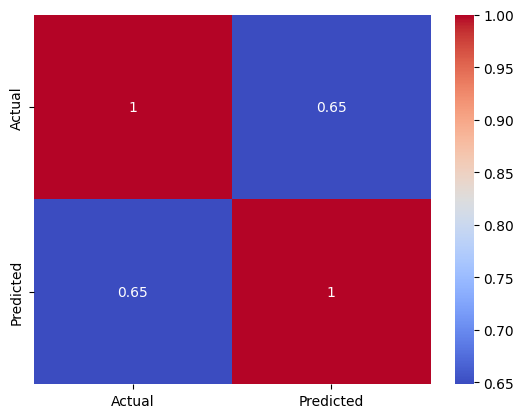

In [309]:
#heatmap that show relation of x_test and y_test
sns.heatmap(target.corr(),annot=True,cmap='coolwarm')

In [310]:
abcd= [x for i in np.linspace(100,1200,12)]

In [317]:
param = {
    'ccp_alpha': 'abcd'
    }